In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [37]:
degrees = [0,45,90]
degrees = [90,135,180]
sinx = np.sin(np.array(degrees)*2*np.pi/360)
test_df = pd.DataFrame({"degrees": degrees,
                       "sinx": sinx})
test_df.corr(method = "pearson")

,degrees,sinx
degrees,1.000000,-0.972575
sinx,-0.972575,1.000000


    # Importing Data from the CSV file 

In [2]:
df_economic_data = pd.read_csv("Data for the Economics .csv")

In [3]:
df_economic_data.head()

,Day,Interest Rate,Futures Index
0,1,7.43,221
1,2,7.48,222
2,3,8.00,226
3,4,7.75,225
4,5,7.60,224


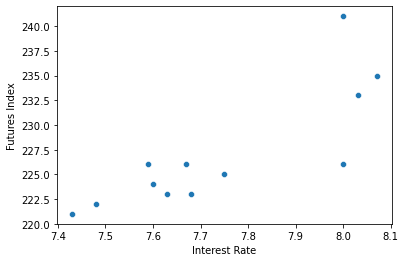

In [4]:
sns.scatterplot(data=df_economic_data, x="Interest Rate", y = "Futures Index")

In [5]:
df_economic_data[["Interest Rate", "Futures Index"]].corr(method = "pearson")

,Interest Rate,Futures Index
Interest Rate,1.000000,0.815254
Futures Index,0.815254,1.000000


In [6]:
df_economic_data.columns = ["Days", "Interest_Rate", "Futures_Index"]

In [7]:
model = smf.ols(formula="Futures_Index ~ Interest_Rate", data=df_economic_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Futures_Index   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     19.82
Date:                Fri, 25 Feb 2022   Prob (F-statistic):            0.00123
Time:                        11:40:46   Log-Likelihood:                -31.585
No. Observations:                  12   AIC:                             67.17
Df Residuals:                      10   BIC:                             68.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        56.4740     38.338      1.473

Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

Text(232.7195178767338, 8.28048212326621, '11')

Text(232.7195178767338, -6.719517876733789, '2')

Text(225.66969747065616, -2.6696974706561605, '6')

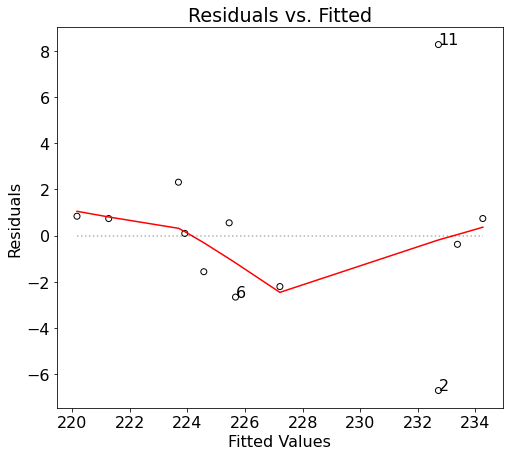

In [8]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

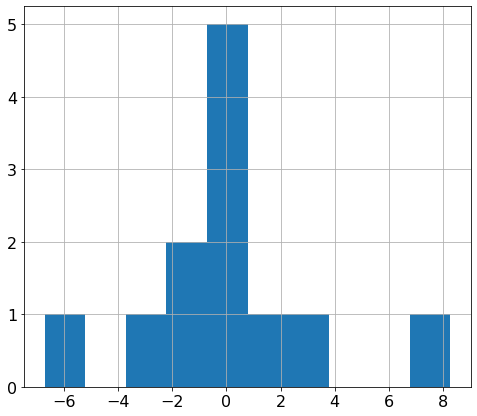

In [9]:
residuals.hist()

Text(0.5, 1.0, 'Normal Q-Q')

Text(0, 0.5, 'Standardized Residuals')

Text(0.5, 0, 'Theoretical Quantiles')

Text(1.5881546429662674, 2.5144533429528737, '11')

Text(-1.5881546429662674, -2.040450536172443, '2')

Text(-1.0981497546858916, -0.7597716691875208, '6')

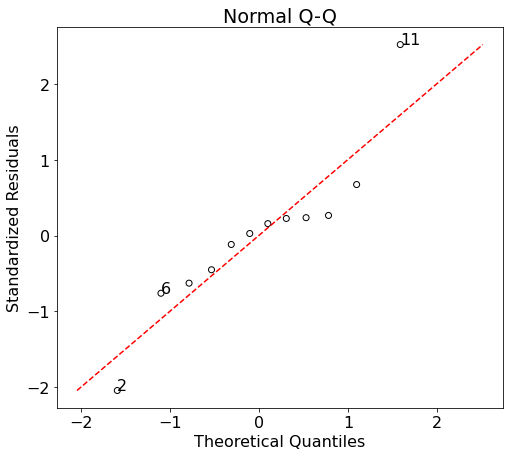

In [10]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

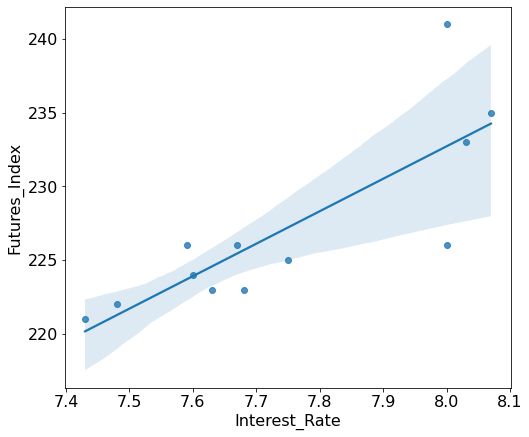

In [11]:
sns.regplot(x="Interest_Rate", y="Futures_Index", data=df_economic_data)

In [12]:
print(results.fittedvalues)

0     220.162025
1     221.263560
2     232.719518
3     227.211846
4     223.907242
5     224.568163
6     225.669697
7     225.449391
8     223.686935
9     234.261666
10    233.380439
11    232.719518
dtype: float64


In [13]:
print(df_economic_data['Futures_Index'])

0     221
1     222
2     226
3     225
4     224
5     223
6     223
7     226
8     226
9     235
10    233
11    241
Name: Futures_Index, dtype: int64


In [14]:
print(df_economic_data['Interest_Rate'])

0     7.43
1     7.48
2     8.00
3     7.75
4     7.60
5     7.63
6     7.68
7     7.67
8     7.59
9     8.07
10    8.03
11    8.00
Name: Interest_Rate, dtype: float64


In [18]:
X_new = pd.DataFrame({'Interest_Rate': [7.7, 7.8,7.9]})

In [25]:
predictions=results.get_prediction(X_new)


In [26]:
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,226.110311,1.085994,223.690565,228.530058,217.550450,234.670172
1,228.313380,1.099070,225.864499,230.762261,219.745237,236.881523
2,230.516449,1.313895,227.588908,233.443990,221.799423,239.233475


In [27]:
predictions.summary_frame(alpha = 0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,226.110311,1.085994,224.141988,228.078634,219.147363,233.073260
1,228.313380,1.099070,226.321358,230.305402,221.343695,235.283065
2,230.516449,1.313895,228.135065,232.897833,223.425656,237.607242


230.29479999999998